## 1. Load model

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

## basic model

In [6]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)



In [ ]:
# Use the model
model.train(data="coco8.yaml", epochs=3)  # train the model
metrics = model.val()  # evaluate model performance on the validation set

In [ ]:
# export the model to ONNX format
path = model.export(format="onnx")

In [4]:
results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 c:\Users\kdkas\Desktop\projects\yoloemotion\bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 405.6ms
Speed: 14.0ms preprocess, 405.6ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 480)


In [17]:
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'


In [19]:
results = model(img)



Found https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland,_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland,_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg locally at 800px-Cars_in_traffic_in_Auckland,_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg
image 1/1 c:\Users\kdkas\Desktop\projects\yoloemotion\800px-Cars_in_traffic_in_Auckland,_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg: 448x640 36 cars, 2 trucks, 329.9ms
Speed: 11.0ms preprocess, 329.9ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


In [ ]:
from PIL import Image

# accepts all formats - image/dir/Path/URL/video/PIL/ndarray. 0 for webcam
results = model.predict(source="0", show=True)  # Display preds. Accepts all YOLO predict arguments

In [3]:
from ultralytics import YOLO

# Load a model
model2 = YOLO("yolov8s.yaml")  # build a new model from scratch
model2 = YOLO("yolov8s.pt")  # load a pretrained model (recommended for training)

100%|██████████| 21.5M/21.5M [01:38<00:00, 229kB/s] 


## Train

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from YAML
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)
model = YOLO("yolov8n.yaml").load("yolov8n.pt")  # build from YAML and transfer weights

# Train the model
results = model.train(data="image_data.yml", epochs=3, imgsz=480)

## Test

In [28]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.yaml")
model = YOLO("runs/detect/train_colab/weights/best.pt")

In [ ]:
from PIL import Image

# accepts all formats - image/dir/Path/URL/video/PIL/ndarray. 0 for webcam
results = model.predict(source="0", show=True)  # Display preds. Accepts all YOLO predict arguments

In [29]:
model.names

{0: 'anger',
 1: 'contempt',
 2: 'disgust',
 3: 'fear',
 4: 'happy',
 5: 'neutral',
 6: 'sad',
 7: 'surprised'}

In [30]:
import cv2
from ultralytics import YOLO, solutions

In [27]:
del(model)


0: 320x320 7 happys, 267.6ms
Speed: 2.0ms preprocess, 267.6ms inference, 1.9ms postprocess per image at shape (1, 3, 320, 320)

0: 320x320 1 happy, 265.0ms
Speed: 3.0ms preprocess, 265.0ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 320)

0: 320x320 7 happys, 258.1ms
Speed: 4.0ms preprocess, 258.1ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 320)

0: 320x320 1 happy, 261.1ms
Speed: 3.0ms preprocess, 261.1ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 320)

0: 320x320 7 happys, 314.0ms
Speed: 3.0ms preprocess, 314.0ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 320)

0: 320x320 1 happy, 245.0ms
Speed: 4.0ms preprocess, 245.0ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 320)

0: 320x320 7 happys, 250.0ms
Speed: 4.0ms preprocess, 250.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 320)

0: 320x320 1 happy, 315.0ms
Speed: 1.0ms preprocess, 315.0ms inference, 1.0ms postprocess per image at sha

KeyboardInterrupt: 

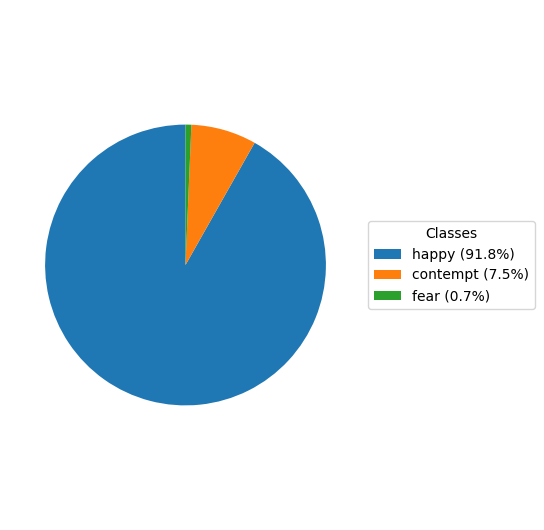

In [31]:


# Load your YOLO model
model = model

# 0 for webcam, 'filepath' for video files
cap = cv2.VideoCapture("vid.mp4")
assert cap.isOpened(), "Error reading video file"
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))

out = cv2.VideoWriter("pie_chart.avi", cv2.VideoWriter_fourcc(*"MJPG"), fps, (w, h))

analytics = solutions.Analytics(
    type="pie",
    writer=out,
    im0_shape=(w, h),
    view_img=True,
)

# Initialize the cumulative class count dictionary
clswise_count = {}

while cap.isOpened():
    success, frame = cap.read()
    if success:
        results = model.track(frame, persist=True, verbose=True)
        if results[0].boxes.id is not None:
            boxes = results[0].boxes.xyxy.cpu()
            clss = results[0].boxes.cls.cpu().tolist()
            for box, cls in zip(boxes, clss):
                class_name = model.names[int(cls)]
                if class_name in clswise_count:
                    clswise_count[class_name] += 1
                else:
                    clswise_count[class_name] = 1

            analytics.update_pie(clswise_count)
        
        # Display the frame with the real-time pie chart (optional)
        results = model.predict(source=frame, show=True)

        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        break



In [32]:
cap.release()
out.release()
cv2.destroyAllWindows()